In [1]:
import numpy as np
import pandas as pd
from typing import Optional

class MeanBaseline:
    def __init__(self) -> None:
        self.mean = None

    def fit(self, dataframe: pd.DataFrame, window: Optional[int] = None) -> None:
        """
        Fit the MeanBaseline model to the input DataFrame.

        Args:
            dataframe (pd.DataFrame): The input DataFrame.
            window (int, optional): The size of the rolling window. If not provided, the window size is set to the
                                    number of rows in the DataFrame.

        Returns:
            None
        """
        if window is None:
            window = dataframe.shape[0]

        self.mean = dataframe.rolling(window).mean()

    def predict(self, length: int) -> pd.DataFrame:
        """
        Generate predictions using the MeanBaseline model.

        Args:
            length (int): The number of predictions to generate.

        Returns:
            pd.DataFrame: The predicted values.
        """
        array = np.ones(shape=(length, self.mean.shape[1]))
        result = array * np.array(self.mean.iloc[-1, :])
        result = pd.DataFrame(result)
        return result


In [ ]:
class OffsetBaseline:
    def __init__(self) -> None:
        self.offset = None

    def fit(self, dataframe: pd.DataFrame, offset: int) -> None:
        """
        Fit the OffsetBaseline model to the input DataFrame.

        Args:
            dataframe (pd.DataFrame): The input DataFrame.
            offset (int): Model is looking back with offset on trained data

        Returns:
            None
        """

        self.offset = dataframe.offset(offset) # CONTINUE HERE!!!!!!!!!

    def predict(self, length: int) -> pd.DataFrame:
        """
        Generate predictions using the MeanBaseline model.

        Args:
            length (int): The number of predictions to generate.

        Returns:
            pd.DataFrame: The predicted values.
        """
        array = np.ones(shape=(length, self.mean.shape[1]))
        result = array * np.array(self.mean.iloc[-1, :])
        result = pd.DataFrame(result)
        return result


In [2]:
df = pd.read_pickle('data/final_dataframe.pkl')

In [3]:
column_names = ['date','pv_orig','pv_calc','load_orig','price_calc']

In [4]:
df.columns = column_names

In [5]:
df.head()

,date,pv_orig,pv_calc,load_orig,price_calc
0,2018-10-01 00:00:00,0.0,42805,NaN,59.53
1,2018-10-01 00:15:00,0.0,42805,NaN,59.53
2,2018-10-01 00:30:00,0.0,42805,NaN,59.53
3,2018-10-01 00:45:00,0.0,42805,NaN,59.53
4,2018-10-01 01:00:00,0.0,42805,"10,589.75",56.10


In [7]:
df.set_index('date',inplace=True, drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163680 entries, 2018-10-01 00:00:00 to 2023-06-01 23:45:00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pv_orig     163676 non-null  object 
 1   pv_calc     163680 non-null  int64  
 2   load_orig   163664 non-null  object 
 3   price_calc  163680 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Note: There are still object-type columns in the df

In [9]:
baseline_model = MeanBaseline()

In [10]:
baseline_model.fit(df[['price_calc','pv_calc']], window=24*4)

In [29]:
df_new = pd.concat([df.reset_index(drop=True),baseline_model.predict(24*4)],ignore_index=True)

In [33]:
df_new.drop(['pv_orig','load_orig'],inplace=True,axis=1)

In [6]:
import matplotlib.pyplot as plt

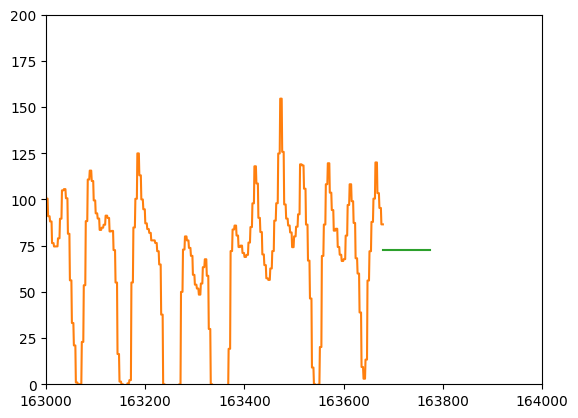

In [45]:
fig = plt.figure()
ax = plt.subplot()
plt.plot(df_new)
plt.ylim(0,200)
plt.xlim(163000,164000)
plt.show()

In [ ]:
'''class MeanBaseline:

    def __init__(self) -> None:
        self.mean = None

    def fit(self,DataFrame,window=None):
        
        if window == None:
            window = DataFrame.shape[0]

        self.mean = DataFrame.rolling(window).mean()

    def predict(self,length):
        array = np.ones(shape=(length,self.mean.shape[1]))
        result = array * np.array(self.mean.iloc[-1,:])
        result = pd.DataFrame(result)
        return result
'''


In [1]:
df

NameError: name 'df' is not defined